In [97]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [98]:
x = torch.from_numpy(np.arange(1, 7, 1).reshape(3, 2))
x

tensor([[1, 2],
        [3, 4],
        [5, 6]])

In [99]:
intermed = torch.matmul(x.T,x)
intermed

tensor([[35, 44],
        [44, 56]])

In [100]:
torch.matmul(intermed, x.T)

tensor([[123, 281, 439],
        [156, 356, 556]])

In [101]:
time = np.arange(20)
speed = np.arange(20) + 5
model = np.poly1d(np.polyfit(time, speed, 2))
model


poly1d([-2.66900469e-17,  1.00000000e+00,  5.00000000e+00])

# Autograd Quadratic

tensor(16., dtype=torch.float64)
tensor(8.2109, dtype=torch.float64)
tensor(7.2721, dtype=torch.float64)
tensor(7.1533, dtype=torch.float64)
tensor(7.1363, dtype=torch.float64)
tensor(7.1324, dtype=torch.float64)
tensor(7.1304, dtype=torch.float64)
tensor(7.1285, dtype=torch.float64)
tensor(7.1268, dtype=torch.float64)
tensor(7.1250, dtype=torch.float64)
tensor(7.1233, dtype=torch.float64)
tensor(7.1216, dtype=torch.float64)
tensor(7.1199, dtype=torch.float64)
tensor(7.1182, dtype=torch.float64)
tensor(7.1166, dtype=torch.float64)
tensor(7.1150, dtype=torch.float64)
tensor(7.1133, dtype=torch.float64)
tensor(7.1117, dtype=torch.float64)
tensor(7.1101, dtype=torch.float64)
tensor(7.1086, dtype=torch.float64)
tensor(7.1070, dtype=torch.float64)
tensor(7.1055, dtype=torch.float64)
tensor(7.1040, dtype=torch.float64)
tensor(7.1025, dtype=torch.float64)
tensor(7.1010, dtype=torch.float64)
tensor(7.0995, dtype=torch.float64)
tensor(7.0980, dtype=torch.float64)
tensor(7.0966, dtype=torch.floa

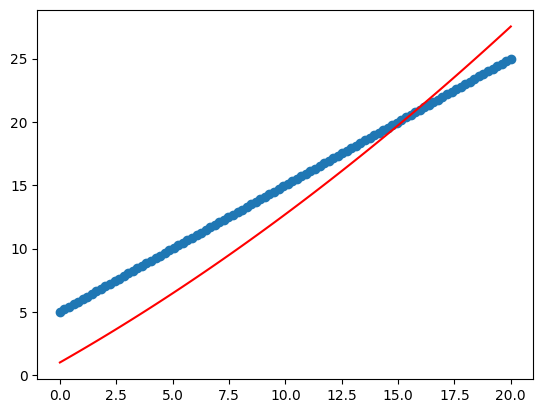

In [116]:
class QuadraticModel:
    def __init__(self, a=0, b=0, c=0):
        self.a = torch.Tensor([a])
        self.b = torch.Tensor([b])
        self.c = torch.Tensor([c])
        self.a.requires_grad = True
        self.b.requires_grad = True
        self.c.requires_grad = True
        self.params = [self.a, self.b, self.c]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.a * time ** 2 + self.b * time + self.c
        self.loss = torch.mean((self.out - speed) ** 2)
        self.loss.backward()
    
    def step(self, lr):
        with torch.no_grad():
            self.a -= lr * self.a.grad
            self.b -= lr * self.b.grad
            self.c -= lr * self.c.grad
            for param in self.params:
                param.grad.zero_()

n = 10
time = torch.from_numpy(np.linspace(0, 20, n)) # x
speed = torch.from_numpy(np.linspace(5, 25, n)) # y = 0x^2 + 1x + 5
model = QuadraticModel(a=0, b=1, c=1)
lr = 1e-5
for i in range(1000):
    model.compute(time, speed)
    print(model.loss.data)
    # print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
    model.step(lr)
    lr *= 0.99

print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

tensor(259.0067, dtype=torch.float64)
tensor(31429.3254, dtype=torch.float64)
tensor(2107.1187, dtype=torch.float64)
tensor(7006.4254, dtype=torch.float64)
tensor(17834.2143, dtype=torch.float64)
tensor(12283.3995, dtype=torch.float64)
tensor(2637.1688, dtype=torch.float64)
tensor(370.5531, dtype=torch.float64)
tensor(5374.4801, dtype=torch.float64)
tensor(9139.8617, dtype=torch.float64)
tensor(7135.8819, dtype=torch.float64)
tensor(2458.7470, dtype=torch.float64)
tensor(38.9562, dtype=torch.float64)
tensor(1522.0746, dtype=torch.float64)
tensor(4266.3122, dtype=torch.float64)
tensor(4861.1958, dtype=torch.float64)
tensor(2885.0525, dtype=torch.float64)
tensor(590.7175, dtype=torch.float64)
tensor(119.2429, dtype=torch.float64)
tensor(1437.8973, dtype=torch.float64)
tensor(2699.5982, dtype=torch.float64)
tensor(2458.9574, dtype=torch.float64)
tensor(1099.0275, dtype=torch.float64)
tensor(86.1968, dtype=torch.float64)
tensor(293.4890, dtype=torch.float64)
tensor(1189.8031, dtype=torch.f

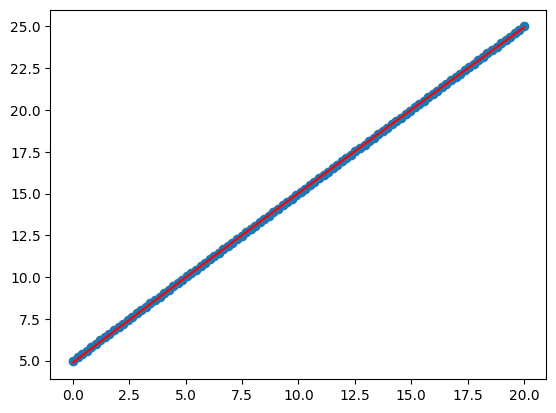

In [117]:

class QuadraticModel:
    def __init__(self, a=0, b=0, c=0):
        self.a = torch.Tensor([a])
        self.b = torch.Tensor([b])
        self.c = torch.Tensor([c])
        self.a.requires_grad = True
        self.b.requires_grad = True
        self.c.requires_grad = True
        self.params = [self.a, self.b, self.c]
        self.out = None
        self.loss = None
    
    def compute(self, time, speed):
        self.out = self.a * time ** 2 + self.b * time + self.c
        self.loss = torch.mean((self.out - speed) ** 2)
    
    def step(self, optimizer):
        optimizer.zero_grad()
        self.loss.backward()
        optimizer.step()

model = QuadraticModel(a=0, b=0, c=0)
optimizer = torch.optim.Adam(model.params, lr=1)

for i in range(500):
    model.compute(time, speed)
    model.step(optimizer)
    print(model.loss.data)

print("a=", model.a.data, "b=", model.b.data, "c=", model.c.data)
plt.plot(time.numpy(), speed.numpy(), 'o')
plt.plot(time.numpy(), model.out.data.numpy(), 'r-')

This is testing I've been doing to identify what "correct" behavior looks like by using pytorch.
Without an optimizer, the model doesn't converge to the best minimum (which is what I was first seeing in the Zig code)